In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('hu_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7443 entries, 0 to 7442
Data columns (total 10 columns):
CUSTOMER_ID         7443 non-null int64
ORDERS              7443 non-null int64
FIRST_ORDER_DATE    7443 non-null object
LAST_ORDER_DATE     7443 non-null object
TOTAL_CM2           7443 non-null object
NET_SALES           7443 non-null object
CM2_REL             7443 non-null object
ZTQ_ID              7443 non-null int64
START_DATE          7443 non-null object
EXPIRY_DATE         7443 non-null object
dtypes: int64(3), object(7)
memory usage: 581.6+ KB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,8116945,7,2017-06-03,2018-05-01,42.1964,707.3064,5.97,54,2015-06-30,2018-06-30
1,10592245,20,2017-06-11,2018-05-25,0.3716,1158.5632,0.03,54,2016-01-08,2019-01-08
2,12418384,8,2017-07-25,2018-05-11,61.3529,585.5591,10.48,52,2016-03-16,2019-03-16
3,9317076,7,2017-07-10,2018-03-16,73.1310,537.2566,13.61,52,2016-05-20,2019-05-20
4,9622539,7,2017-07-20,2018-05-30,-30.0146,233.5246,-12.85,54,2016-08-04,2019-08-04


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


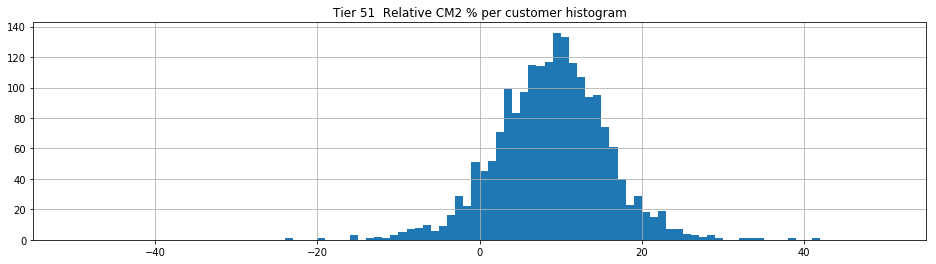

,CM2_REL
count,1960.00
mean,8.83
std,6.72
min,-23.41
25%,4.65
50%,9.10
75%,13.09
max,41.39


CM2% threshold >= 5  is the percentile 26.79
CM2% threshold >= 7  is the percentile 37.6
CM2% threshold >=  5.617  is the percentile 30 allowing us to stay with the 70% of our sample


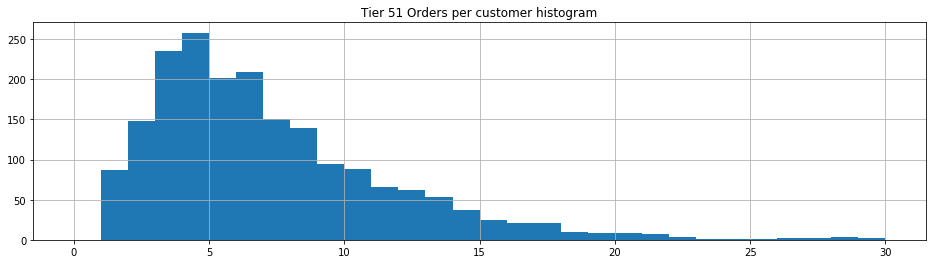

,ORDERS
count,1960.00
mean,6.97
std,5.28
min,1.00
25%,4.00
50%,6.00
75%,9.00
max,55.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  56.89  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  48.11  % from our customers
With CM2% threshold >=  5.617  and Orders >=  4.0  we keep eligible a  54.23  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


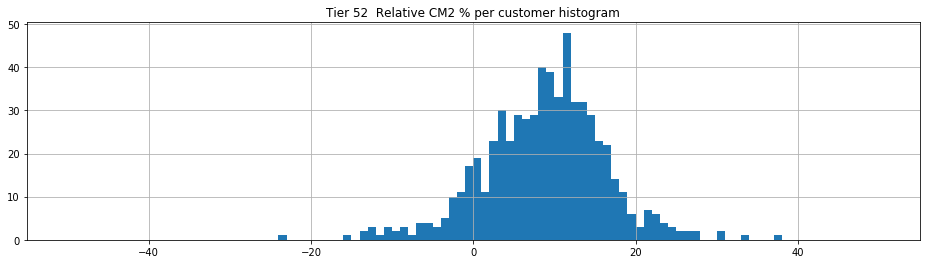

,CM2_REL
count,626.00
mean,8.80
std,7.67
min,-23.61
25%,4.26
50%,9.21
75%,13.41
max,51.53


CM2% threshold >= 5  is the percentile 28.27
CM2% threshold >= 7  is the percentile 37.38
CM2% threshold >=  5.369999999999999  is the percentile 30 allowing us to stay with the 70% of our sample


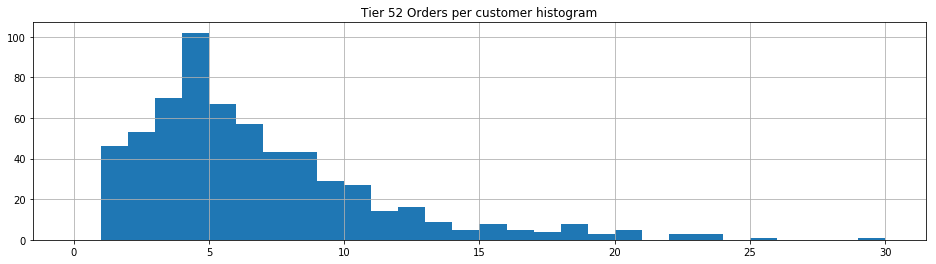

,ORDERS
count,626.00
mean,6.55
std,5.53
min,1.00
25%,3.00
50%,5.00
75%,8.00
max,52.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  52.88  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  45.37  % from our customers
With CM2% threshold >=  5.369999999999999  and Orders >=  4.0  we keep eligible a  51.44  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


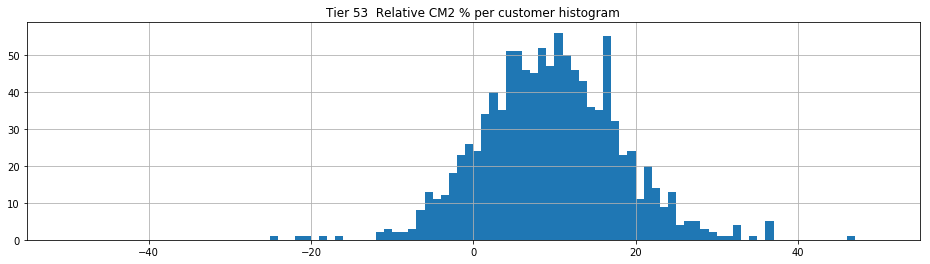

,CM2_REL
count,1052.00
mean,9.52
std,8.41
min,-24.35
25%,4.01
50%,9.41
75%,15.17
max,46.58


CM2% threshold >= 5  is the percentile 29.66
CM2% threshold >= 7  is the percentile 38.88
CM2% threshold >=  5.0920000000000005  is the percentile 30 allowing us to stay with the 70% of our sample


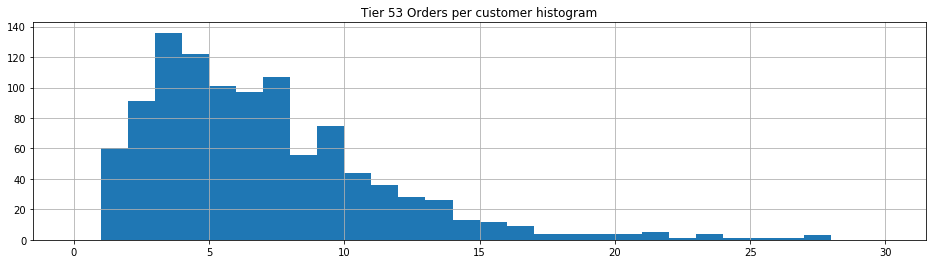

,ORDERS
count,1052.00
mean,6.71
std,5.07
min,1.00
25%,3.00
50%,6.00
75%,9.00
max,46.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  50.29  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  43.06  % from our customers
With CM2% threshold >=  5.0920000000000005  and Orders >=  4.0  we keep eligible a  50.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


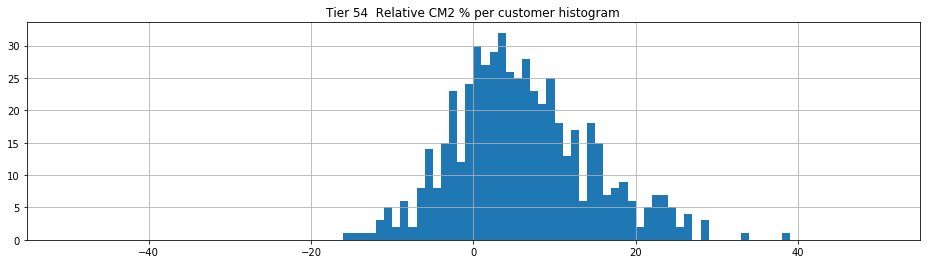

,CM2_REL
count,546.00
mean,6.05
std,8.47
min,-15.12
25%,0.36
50%,5.08
75%,10.93
max,38.25


CM2% threshold >= 5  is the percentile 49.45
CM2% threshold >= 7  is the percentile 59.16
CM2% threshold >=  1.27  is the percentile 30 allowing us to stay with the 70% of our sample


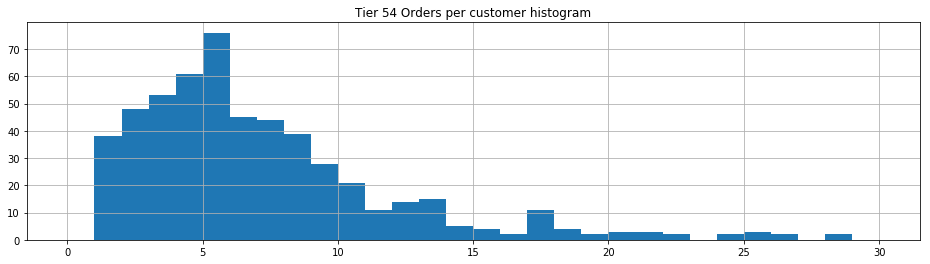

,ORDERS
count,546.00
mean,7.35
std,7.55
min,1.00
25%,3.00
50%,5.00
75%,9.00
max,95.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  35.35  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  28.94  % from our customers
With CM2% threshold >=  1.27  and Orders >=  4.0  we keep eligible a  51.28  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


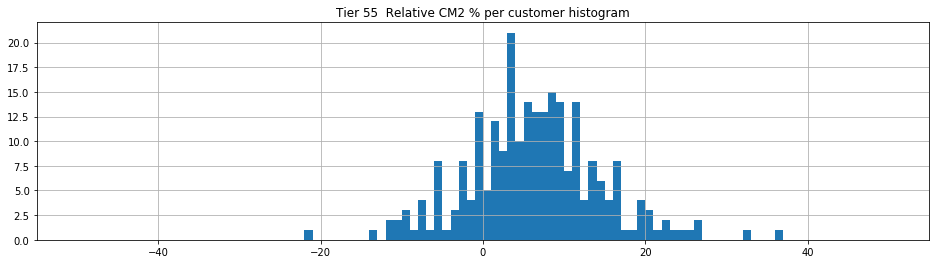

,CM2_REL
count,248.00
mean,6.24
std,8.24
min,-21.92
25%,1.28
50%,6.12
75%,11.05
max,36.36


CM2% threshold >= 5  is the percentile 43.95
CM2% threshold >= 7  is the percentile 54.84
CM2% threshold >=  2.5729999999999995  is the percentile 30 allowing us to stay with the 70% of our sample


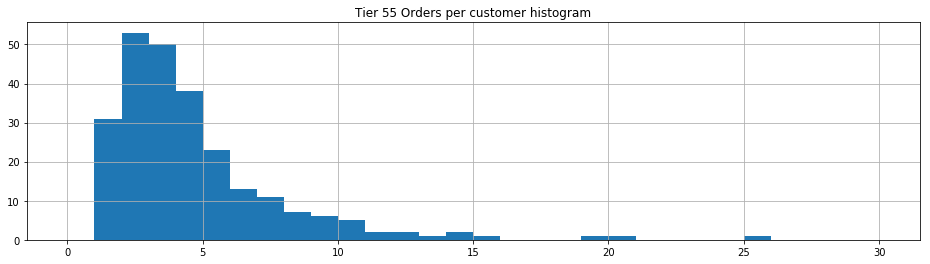

,ORDERS
count,248.00
mean,4.17
std,3.31
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,25.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  51.61  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  40.73  % from our customers
With CM2% threshold >=  2.5729999999999995  and Orders >=  2.0  we keep eligible a  62.5  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


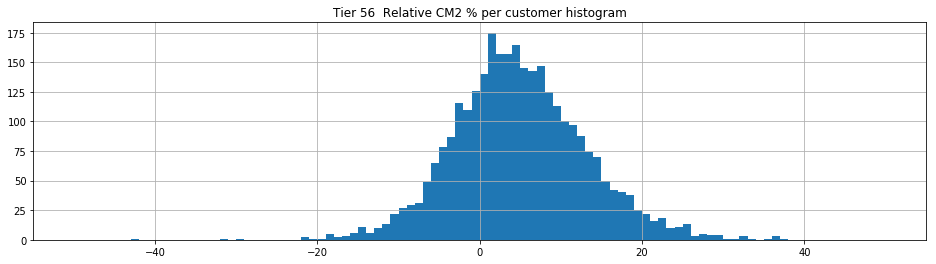

,CM2_REL
count,3011.00
mean,4.88
std,8.18
min,-42.74
25%,-0.39
50%,4.47
75%,9.90
max,37.32


CM2% threshold >= 5  is the percentile 53.04
CM2% threshold >= 7  is the percentile 62.6
CM2% threshold >=  0.74  is the percentile 30 allowing us to stay with the 70% of our sample


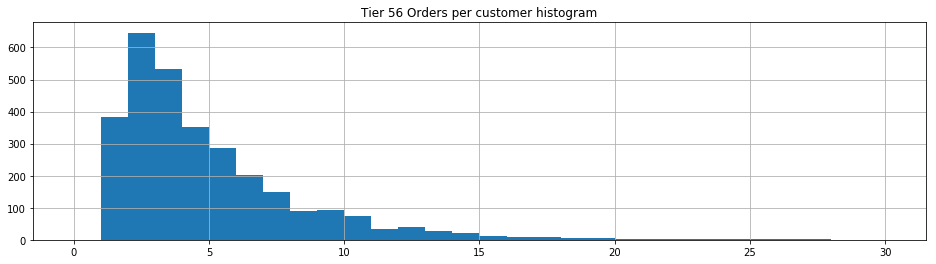

,ORDERS
count,3011.00
mean,4.63
std,4.47
min,1.00
25%,2.00
50%,3.00
75%,6.00
max,88.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  39.19  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  30.65  % from our customers
With CM2% threshold >=  0.74  and Orders >=  2.0  we keep eligible a  60.38  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,1141.0,55.936779,23.261248,20.502500,40.462612,50.684029,65.256410,266.881867
52,368.0,67.547139,36.410016,21.952825,45.170661,57.351951,77.670472,303.895800
53,602.0,58.791568,31.304234,20.309625,40.524377,52.006217,68.930502,406.027640
54,314.0,73.538628,41.570627,25.091000,45.122537,62.646473,89.609445,369.894560
55,103.0,44.401720,16.271418,21.025480,32.463276,40.275044,52.330216,127.603525
56,1247.0,56.505773,27.468217,21.053925,40.187075,49.689900,64.104595,331.216520


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,1141.0,9.200894,6.007816,-12.42,5.430,9.54,13.2000,29.49
52,368.0,8.762962,6.769558,-15.11,4.295,9.56,13.3925,27.73
53,602.0,9.936262,8.038401,-11.61,4.580,9.79,15.3550,46.58
54,314.0,6.277452,7.881712,-12.85,0.905,5.11,11.2450,28.57
55,103.0,6.176990,7.723373,-13.70,2.060,5.96,10.1350,26.30
56,1247.0,3.979182,6.942069,-31.30,-0.640,3.77,8.4550,25.80


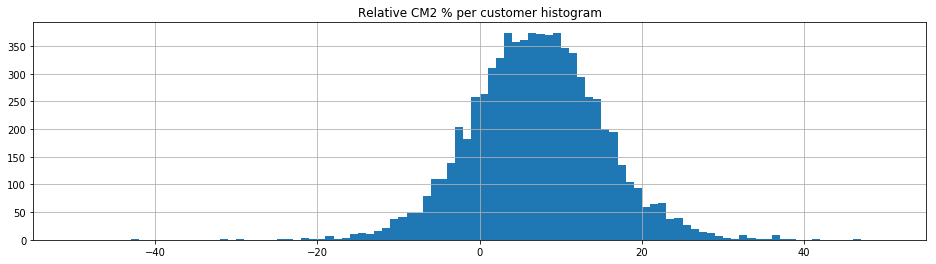

,CM2_REL
count,7443.00
mean,7.04
std,8.08
min,-42.74
25%,1.78
50%,6.99
75%,12.17
max,51.53


CM2% threshold >= 1  is the percentile 21.74
CM2% threshold >= 2  is the percentile 25.92
CM2% threshold >= 3  is the percentile 30.34
CM2% threshold >= 4  is the percentile 35.36
CM2% threshold >= 5  is the percentile 40.17
CM2% threshold >= 6  is the percentile 45.02
CM2% threshold >= 7  is the percentile 50.03
CM2% threshold >= 8  is the percentile 55.02
CM2% threshold >= 9  is the percentile 59.99
CM2% threshold >= 10  is the percentile 65.01
CM2% threshold >=  2.92  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 1  is the percentile', stats.percentileofscore(data['CM2_REL'], 1, kind='strict').round(2))
print('CM2% threshold >= 2  is the percentile', stats.percentileofscore(data['CM2_REL'], 2, kind='strict').round(2))
print('CM2% threshold >= 3  is the percentile', stats.percentileofscore(data['CM2_REL'], 3, kind='strict').round(2))
print('CM2% threshold >= 4  is the percentile', stats.percentileofscore(data['CM2_REL'], 4, kind='strict').round(2))
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

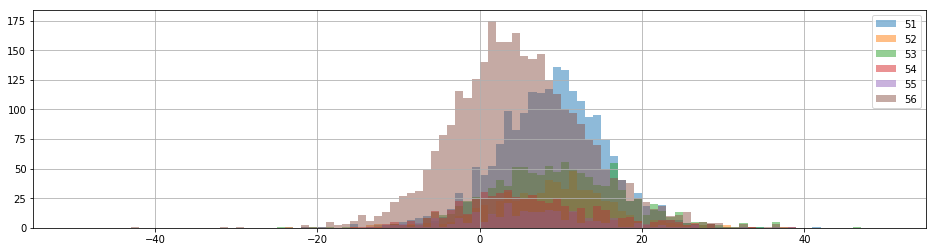

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   